In [478]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

import pickle


In [479]:
data = pd.read_csv('dataset/Network_anomaly_data.csv')


data = data.drop(columns=['protocoltype', 'service', 'flag'])

data['attack'] = data['attack'].apply(lambda x: 0 if x == 'normal' else 1)




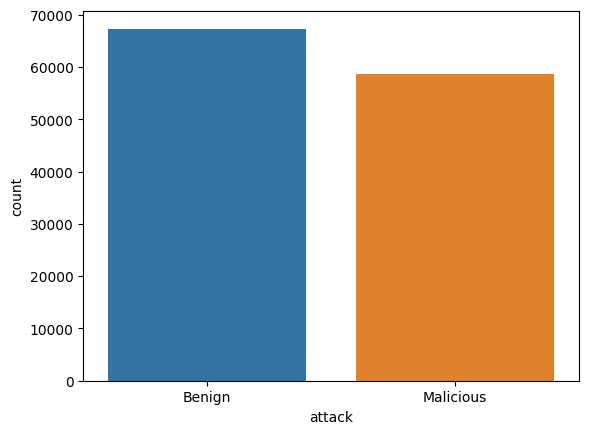

In [480]:
data_anomaly = data[data['attack'] == 1]
data_normal = data[data['attack'] == 0]

df_count = pl.DataFrame({'attack': ['Benign', 'Malicious'], 'count': [data_normal.shape[0], data_anomaly.shape[0]]})
sns.barplot(x='attack', y='count', hue='attack', data=df_count)
plt.show()


In [481]:

target_column = 'attack'  
correlation_threshold = 0.5


correlation_matrix = data.corr()

high_corr_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > correlation_threshold].index.tolist()

high_corr_features.remove(target_column)

high_corr_features.remove("loggedin")
high_corr_features.remove("srvserrorrate")
high_corr_features.remove("samesrvrate")
high_corr_features.remove("dsthostsrvcount")
high_corr_features.remove("dsthostsamesrvrate")
high_corr_features.remove("dsthostserrorrate")
high_corr_features.remove("dsthostsrvserrorrate")
#high_corr_features.remove("count")




print("Highly correlated features with the target:")
print(high_corr_features)


Highly correlated features with the target:
['count', 'serrorrate']


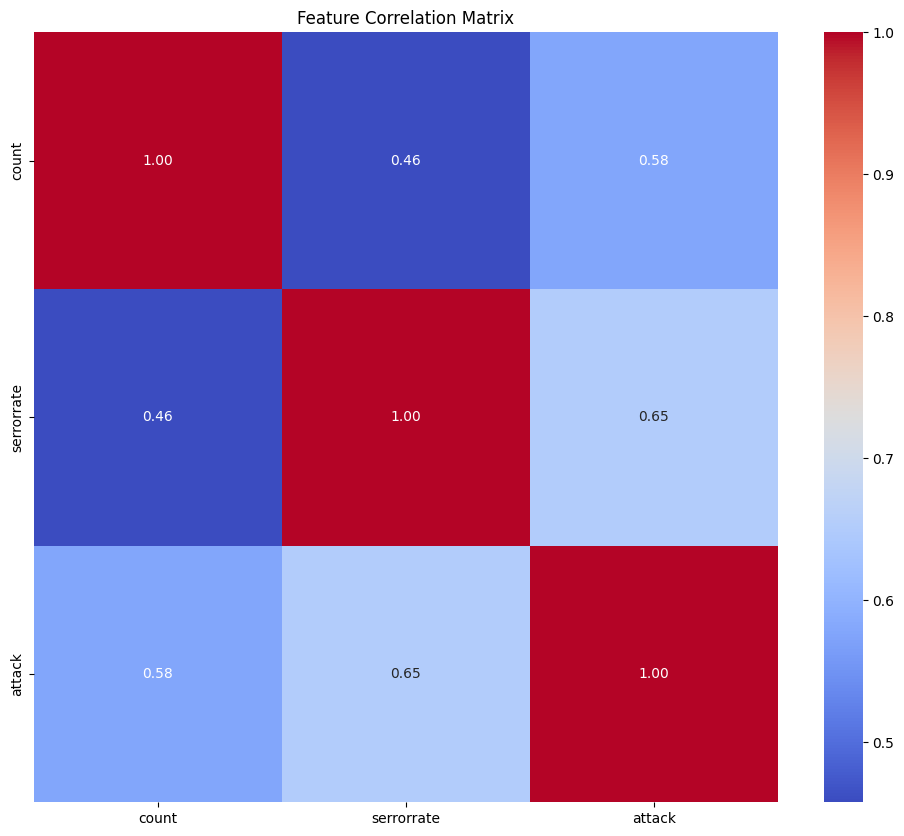

In [482]:
filtered_data = data[high_corr_features + [target_column]]




correlation_matrix = filtered_data.corr()



# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [483]:
X = data.drop('attack', axis=1)  
y = data['attack']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#pca = PCA(n_components=4)  
#X_pca = pca.fit_transform(X_scaled)


In [484]:
Y = filtered_data['attack']
X = filtered_data.drop(columns=['attack'])

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

        count  serrorrate
0           2         0.0
1          13         0.0
2         123         1.0
3           5         0.2
4          30         0.0
...       ...         ...
125968    184         1.0
125969      2         0.0
125970      1         0.0
125971    144         1.0
125972      1         0.0

[125973 rows x 2 columns]


In [485]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

              precision    recall  f1-score   support

      normal     0.8057    0.9333    0.8648      6751
      attack     0.9058    0.7400    0.8146      5847

    accuracy                         0.8436     12598
   macro avg     0.8557    0.8367    0.8397     12598
weighted avg     0.8521    0.8436    0.8415     12598



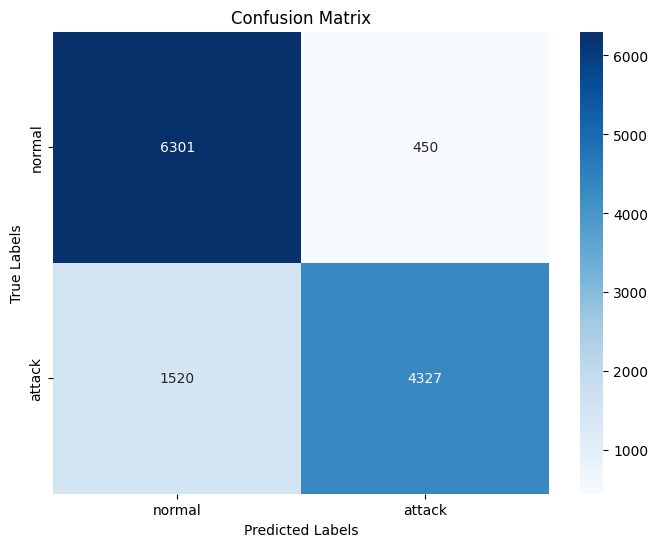

<class 'int'>
<class 'float'>
Predicted class: 0


In [486]:
clf = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['normal', 'attack'], digits=4))


labels = ['normal', 'attack']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show() 

with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(clf, f)


a = 4
b = 0.0

# Define feature names based on your training dataset
feature_names = ["count", "serrorrate"]  # Replace with your actual feature names

# Input features as a pandas DataFrame with correct column names
input_features = pd.DataFrame([[a, b]], columns=feature_names)

pred = clf.predict(input_features)

print(type(4))
print(type(0.0))

print(f"Predicted class: {pred[0]}")
